In [169]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.animation as animation


In [129]:
L=100

# D=0.1

In [292]:
i_rev_list=[]
for i in range(100):
    try:
        mag=pd.read_csv('destab_film_D0.1_v2/i%d/f_mag.dat'%(i), sep=' ', names=['t', 'M'])
        i_rev_list.append(i)
    except:
        pass

In [293]:
list_td=[]
for i in i_rev_list:
    mag=pd.read_csv('destab_film_D0.1_v2/i%d/f_mag.dat'%(i), sep=' ', names=['t', 'M'])
    list_td.append(mag.t[np.where(mag.M<0.9)[0][0]])

In [294]:
len(list_td)

20

In [267]:
np.mean(list_td)

1514110.5752393682

In [201]:
i=29
df_m=pd.read_csv('destab_film_D0.1_v2/i%d/f_profiles_m.dat'%(i), sep=' ', names=['t']+[str(a) for a in np.arange(L)], index_col=False, dtype=np.float64)
mag=pd.read_csv('destab_film_D0.1_v2/i%d/f_mag.dat'%(i), sep=' ', names=['t', 'M'])


(628200.045276, 638200.045276)

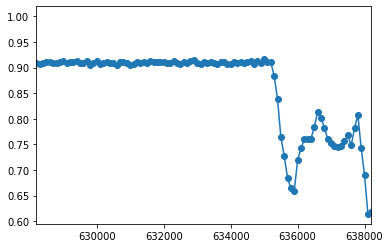

In [190]:
plt.plot(mag.t, mag.M, 'o-')
plt.xlim(mag.t.values[-1]-10000, mag.t.values[-1])

In [215]:
1/1.2

0.8333333333333334

635310.09 1.41316


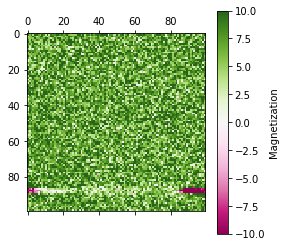

In [264]:
kt=697
t0=np.unique(df_m.t)[kt]
v0=10
X_m=df_m[df_m.t==t0].drop(columns=['t'])
print(t0, np.sum(X_m.values)/(5*100*100))
img=plt.matshow(X_m, cmap='PiYG', vmin=-v0, vmax=v0)

cbar = plt.colorbar(img)
cbar.set_label('Magnetization')


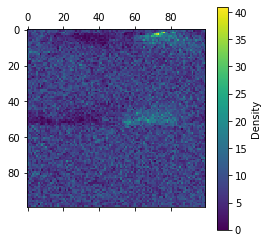

In [69]:
kt=50
t0=np.unique(df_m.t)[kt]
X_rho=df_rho[df_rho.t==t0].drop(columns=['t'])
plt.matshow(X_rho)

cbar = plt.colorbar()
cbar.set_label('Density')


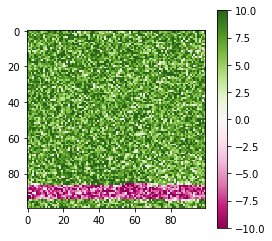

In [199]:

fig, ax = plt.subplots(figsize=(4, 4))

v0=10

kt=600
t0=np.unique(df_m.t)[kt]

X_m=df_m[df_m.t==t0].drop(columns=['t'])

im = plt.imshow(X_m, cmap='PiYG', vmin=-v0, vmax=v0)
plt.colorbar()

def update(*args):
    global kt

    t0=np.unique(df_m.t)[kt]
    X_m=df_m[df_m.t==t0].drop(columns=['t'])
    
    im.set_array(X_m)

    kt += 1

    return im,

ani = animation.FuncAnimation(fig, update, 200)
writer = animation.ImageMagickFileWriter(fps=20)
ani.save('rev3.gif', writer=writer) 

In [227]:
mag=pd.read_csv('../1box/destab_D0.1/i%d/f_mag.dat'%(0), sep=' ', names=['t', 'M'])

(25930000.0, 25970000.0)

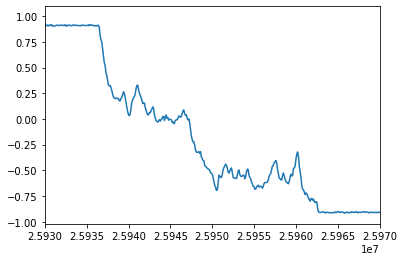

In [232]:
plt.plot(mag.t, mag.M)
plt.xlim(2.593e7,2.597e7)

# D=0.11

In [295]:
i_rev_list=[]
for i in range(100):
    try:
        mag=pd.read_csv('destab_film_D0.11/i%d/f_mag.dat'%(i), sep=' ', names=['t', 'M'])
        i_rev_list.append(i)
    except:
        pass

In [296]:
list_td=[]
for i in i_rev_list:
    mag=pd.read_csv('destab_film_D0.11/i%d/f_mag.dat'%(i), sep=' ', names=['t', 'M'])
    list_td.append(mag.t[np.where(mag.M<0.9)[0][0]])

In [297]:
i_rev_list

[8, 24]

In [298]:
np.mean(list_td)

443100.0840845

In [276]:
i=8
df_m=pd.read_csv('destab_film_D0.11/i%d/f_profiles_m.dat'%(i), sep=' ', names=['t']+[str(a) for a in np.arange(L)], index_col=False, dtype=np.float64)
mag=pd.read_csv('destab_film_D0.11/i%d/f_mag.dat'%(i), sep=' ', names=['t', 'M'])


(265300.09695, 275300.09695)

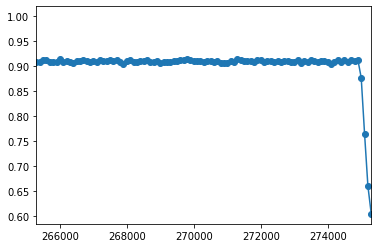

In [277]:
plt.plot(mag.t, mag.M, 'o-')
plt.xlim(mag.t.values[-1]-10000, mag.t.values[-1])

275010.03 1.39032


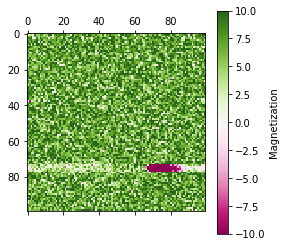

In [291]:
kt=971
t0=np.unique(df_m.t)[kt]
v0=10
X_m=df_m[df_m.t==t0].drop(columns=['t'])
print(t0, np.sum(X_m.values)/(5*100*100))
img=plt.matshow(X_m, cmap='PiYG', vmin=-v0, vmax=v0)

cbar = plt.colorbar(img)
cbar.set_label('Magnetization')
